In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,time,os,itertools

import torch
import pandas as pd

In [12]:
xl = pd.ExcelFile('..\\..\\..\\TF_data\\SHS\\GCR-GPR\\results\\2019\\report.xlsx')

In [13]:
xl.sheet_names

['No Issue Detected', 'Missing in GCR', 'Missing in GPR', 'Deviations']

In [21]:
df = pd.read_excel(xl,sheet_name='Missing in GCR',header=None).rename(columns={
    0:'ARE',
    1:'DepthStr',
    2:'BL',
    3:'Quarter',
    4:'Revenue'
})

In [68]:
pf = pd.pivot_table(df,index=['ARE','DepthStr','BL'],columns='Quarter',values='Revenue').reset_index().fillna(0)
pf.columns.name = 'Index'

pf = pf.rename(columns={
    1:'FY19 Q1',
    2:'FY19 Q2',
    3:'FY19 Q3',
    4:'FY19 Q4'
})

In [100]:
pf

Index,ARE,DepthStr,BL,FY19 Q1,FY19 Q2,FY19 Q3,FY19 Q4
0,401S,HSC00481,own Business Area & own BL,3351.33,3351.33,2234.22,4525.48
1,402S,HSC00183,own Business Area & own BL,0.00,1091.00,408.00,0.00
2,402S,HSC0018417,own Business Area & own BL,0.00,0.00,0.00,9549.50
3,404S,HSC00181,own Business Area & own BL,125000.00,103691.64,0.00,167361.53
4,404S,HSC00183,own Business Area & own BL,0.00,0.00,0.00,15919.01
...,...,...,...,...,...,...,...
336,598P,HSC00185,own Business Area & own BL,0.00,12938.84,646.44,4824.80
337,598P,HSC00381,own Business Area & own BL,114410.72,21923.29,505494.85,142545.06
338,598P,HSC00481,own Business Area & own BL,10232.15,1417.45,6699.28,488.04
339,598P,HSC00881,own Business Area & own BL,750.49,0.00,0.00,23828.76


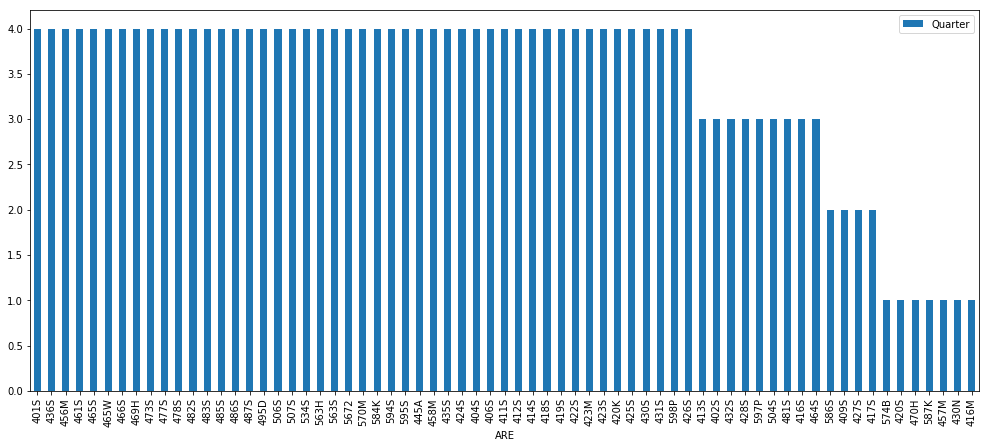

In [94]:
df[['ARE','Quarter']].drop_duplicates().reset_index(drop=True).groupby('ARE').count().sort_values(by=['Quarter'],ascending=False).plot(kind='bar',figsize=(17,7))

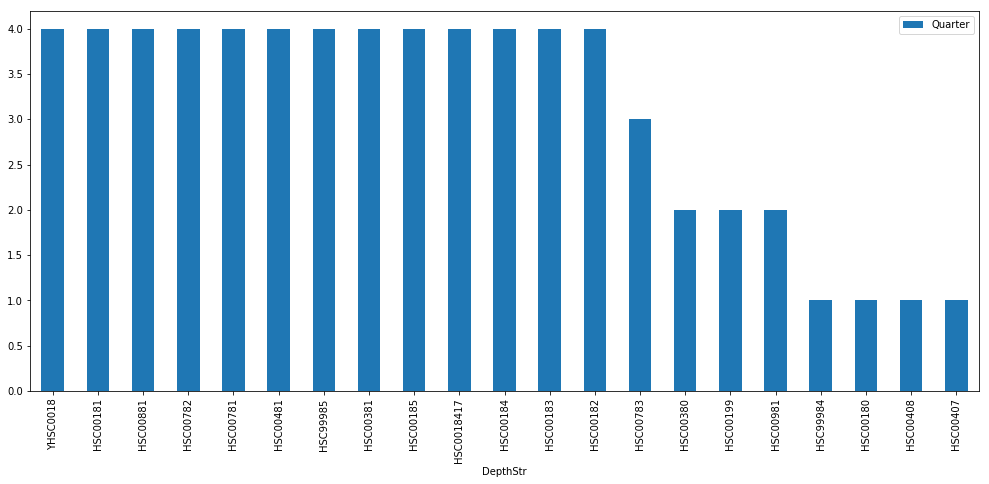

In [98]:
df[['DepthStr','Quarter']].drop_duplicates().reset_index(drop=True).groupby('DepthStr').count().sort_values(by=['Quarter'],ascending=False).plot(kind='bar',figsize=(17,7))

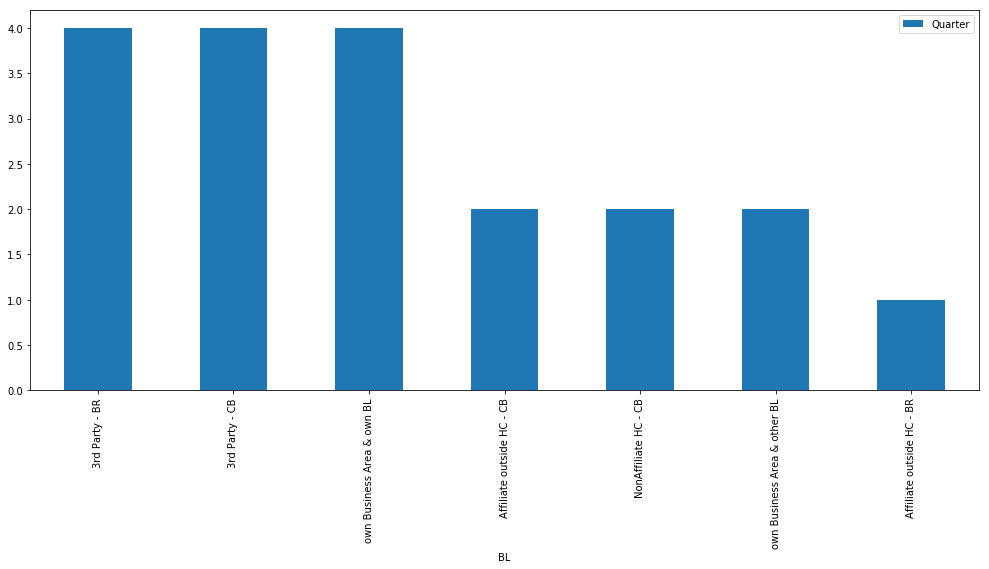

In [99]:
df[['BL','Quarter']].drop_duplicates().reset_index(drop=True).groupby('BL').count().sort_values(by=['Quarter'],ascending=False).plot(kind='bar',figsize=(17,7))